# **Experiment Notebook**



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

## A. Project


In [3]:
student_name = 'Kunal Gurung'

<hr>

## B. Data Understanding


In [5]:
data_understanding_executive_summary = 'The dataset consists of 232,877 transaction records with attributes such as credit card number, account number, transaction amount, category, fraud status, and merchant details. The data captures a wide variety of transactions with most spending being low to moderate amounts, indicating that the majority of customers are frequent low spenders with occasional higher-value purchases. Essential spending categories like groceries and gas dominate the transactions, while discretionary categories such as entertainment are less frequent. The dataset is highly imbalanced in terms of fraud, with very few instances of fraudulent transactions. These characteristics provide a foundation for potential clustering based on spending levels, types of purchases, and geographic locations to gain insights into customer behavior and spending patterns.'

### B.0 Import Packages

In [6]:
# Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn

# Altair for plotting
import altair as alt

# Pandas for data manipulation and analysis
import numpy as np

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<hr>

### B.1   Load Dataset

adults_2550_male.zip:
https://drive.google.com/file/d/1FOcz1QFV1CaoV2t5dJup5z8N7Uxgr2z9/view?usp=drive_link

In [7]:
df1=pd.read_csv('adults_2550_male_rural_000-199.csv', sep="|")
df2=pd.read_csv('adults_2550_male_rural_200-399.csv', sep="|")
df3=pd.read_csv('adults_2550_male_rural_400-599.csv', sep="|")
df4=pd.read_csv('adults_2550_male_rural_600-799.csv', sep="|")
df5=pd.read_csv('adults_2550_male_rural_800-999.csv', sep="|")

df6=pd.read_csv('adults_2550_male_urban_000-199.csv', sep="|")
df7=pd.read_csv('adults_2550_male_urban_200-399.csv', sep="|")
df8=pd.read_csv('adults_2550_male_urban_400-599.csv', sep="|")
df9=pd.read_csv('adults_2550_male_urban_600-799.csv', sep="|")
df10=pd.read_csv('adults_2550_male_urban_800-999.csv', sep="|")

df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis=0)

<hr>

### B.2 Explore Dataset

In [8]:
# Check the first few rows of the data
print(df.head())

             cc_num      acct_num                         trans_num  \
0  6011034324451072  347300118003  5fd8114f0a9e6173c4b6b2d4a1357629   
1  6011034324451072  347300118003  cc6a2a82b2e153d17a61a89b3998f010   
2  6011034324451072  347300118003  036a0c03732a15f6e14a78ebc3954786   
3  6011034324451072  347300118003  ea3861ae99d1115d28df7e9c3a93e819   
4  6011034324451072  347300118003  1106c5d5f386d895e1f159a1f0f25699   

    unix_time       category    amt is_fraud                  merchant  \
0  1642086410  gas_transport  67.37        0                  Kent PLC   
1  1655946207   shopping_pos  71.92        0  Smith, Taylor and Palmer   
2  1647697745    grocery_pos  76.54        0             Johnson Group   
3  1647995663    grocery_pos  63.04        0                 Adams Ltd   
4  1649186549    grocery_pos  83.62        0  Pratt, Joyce and Barajas   

   merch_lat  merch_long  
0  31.722756 -109.043992  
1  32.666096 -108.996380  
2  31.681885 -110.087164  
3  31.643283 -108.29

> Insights: The combination of spending category, amount, and geographic data suggests potential for clustering customers based on transaction types, spending behavior, and preferred merchant locations. The unix_time data could be used for time-series analysis, helping to identify spending trends over time.

In [9]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 232877 entries, 0 to 56248
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      232877 non-null  object 
 1   acct_num    232877 non-null  object 
 2   trans_num   232877 non-null  object 
 3   unix_time   232877 non-null  object 
 4   category    232877 non-null  object 
 5   amt         232877 non-null  float64
 6   is_fraud    232877 non-null  object 
 7   merchant    232877 non-null  object 
 8   merch_lat   232877 non-null  float64
 9   merch_long  232877 non-null  float64
dtypes: float64(3), object(7)
memory usage: 19.5+ MB
None


> Insights: The DataFrame has 232,877 entries. The dataset contains 10 columns, with a mix of categorical (object) and numerical (float64) data types. The dataset size and lack of missing values make it well-suited for clustering algorithms, allowing segmentation based on spending patterns and geographic distribution without extensive preprocessing.

In [10]:
# Summary statistics of numerical columns
print(df.describe())

                 amt      merch_lat     merch_long
count  232877.000000  232877.000000  232877.000000
mean       60.434561      36.874854     -94.235975
std       175.844323       5.480419      18.152690
min         1.000000      18.703211    -156.093208
25%         8.150000      33.570624    -105.676382
50%        38.850000      36.979008     -91.103996
75%        70.660000      40.737583     -80.471864
max     25159.920000      62.629747     -69.191769


> Insights: The average transaction amount is approximately $60.43, indicating that most transactions are relatively low in value. The high standard deviation of $175.84 suggests a wide range of transaction amounts, with both small and large transactions. The skewed distribution of amt suggests clusters based on spending levels. The latitude and longitude distributions allow for clustering by regional spending behaviors.

In [11]:
# Check for duplicates
df.duplicated().sum()

0

> Insights: There are no duplicate rows in the dataset.

In [12]:
# Count of unique values in each column
print(df.nunique())

cc_num           217
acct_num         217
trans_num     232877
unix_time     230874
category          14
amt            24528
is_fraud           2
merchant       21934
merch_lat     231266
merch_long    232182
dtype: int64


> Insights: The diverse transaction categories (category) and amounts (amt) are valuable for clustering customers by spending patterns. The unique merchant locations (merch_lat and merch_long) suggest potential for clustering customers based on where they spend geographically. While timestamps are nearly unique, time-based clusters might show spending trends or preferences over time, though exact duplicates may need to be considered.

In [13]:
# Count unique cc_num values for each acct_num
unique_check = df.groupby('acct_num')['cc_num'].nunique()

# Check if each acct_num has exactly one unique cc_num
same_values = unique_check.eq(1).all()

# Display the result
print("Are cc_num and acct_num the same for unique users?", same_values)

Are cc_num and acct_num the same for unique users? True


> Insights: Since both acct_num and cc_num are unique to each user, it may be redundant to use both identifiers for customer identification. You can use either one as a unique customer identifier in your analysis, which can help in simplifying the dataset by reducing redundant information.

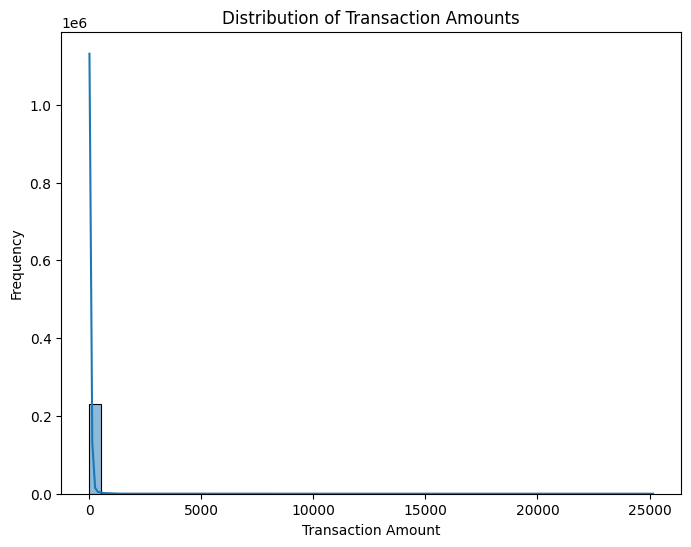

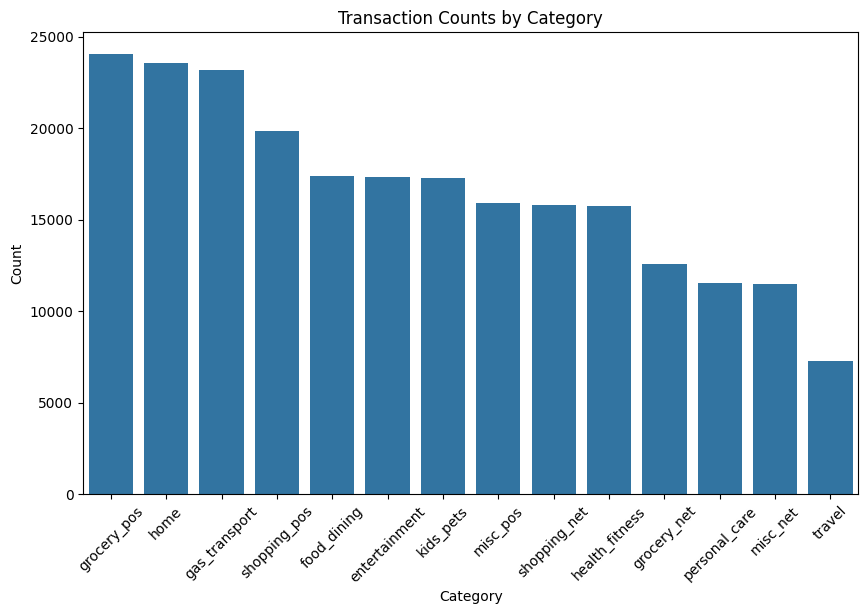

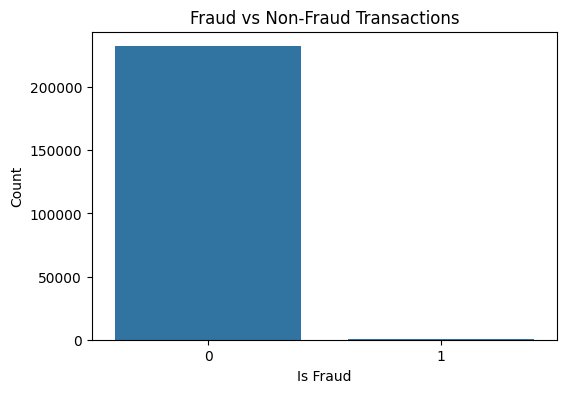

In [14]:
# Distribution of the `amt` column (transaction amount)
plt.figure(figsize=(8, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Transaction counts by `category`
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of `is_fraud` (fraudulent vs. non-fraudulent transactions)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_fraud')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

> Insights: Most transactions are low to moderate amounts, with a few high-value outliers. Indicates groups like frequent low spenders and occasional high spenders. Categories like groceries, home, and gas have the most transactions, showing that spending is focused on essentials. Categories like travel are less common, reflecting occasional or luxury spending patterns. Data suggests clusters based on spending level (low, moderate, high) and spending type (essential vs. discretionary). The vast majority of transactions are non-fraudulent (labeled as 0), with only a very small fraction labeled as fraud (labeled as 1). This indicates a highly imbalanced dataset

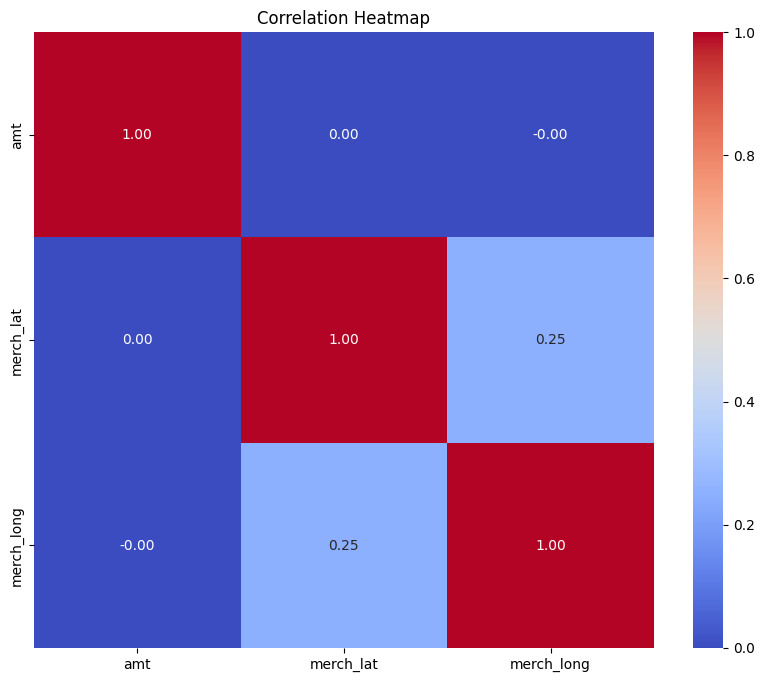

In [15]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

> Insights: The transaction amount is independent of geographic location (both latitude and longitude). This could mean that spending behavior is not directly influenced by where the transaction takes place geographically. The weak correlation between merch_lat and merch_long suggests a slight spatial pattern among merchant locations, potentially indicating some regional clustering. However, the correlation is not strong enough to imply a significant geographic concentration.

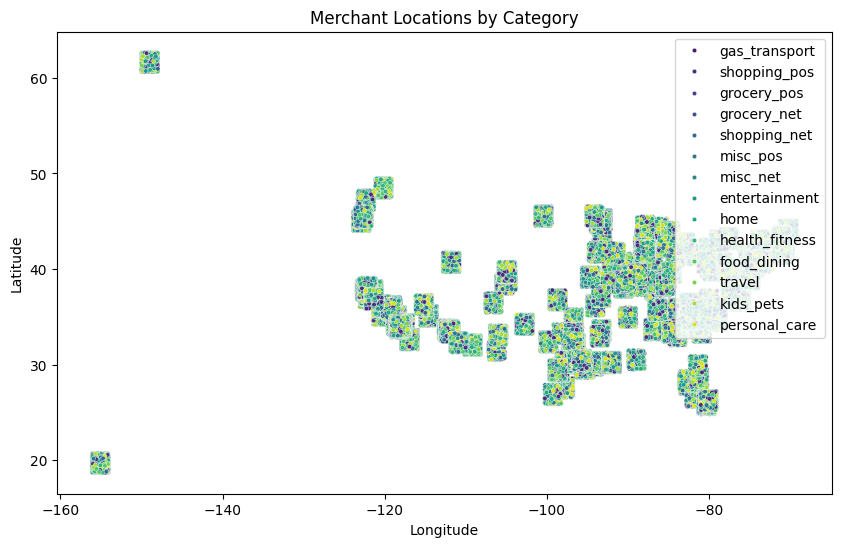

In [16]:
# Scatter plot of merchant latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='merch_long', y='merch_lat', data=df, hue='category', palette='viridis', s=10)
plt.title('Merchant Locations by Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.show()

> Insights: The plot shows distinct merchant clusters by location and an even spread of categories across these locations, making it feasible to cluster customers based on regional spending patterns and preferences. This geographic data could be leveraged to create clusters of customers who tend to shop in specific areas or to identify differences in spending behavior by location.

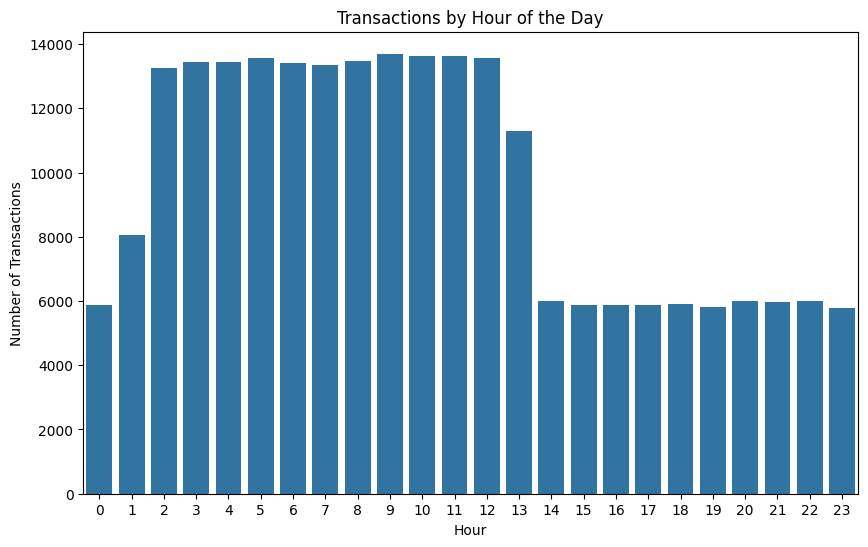

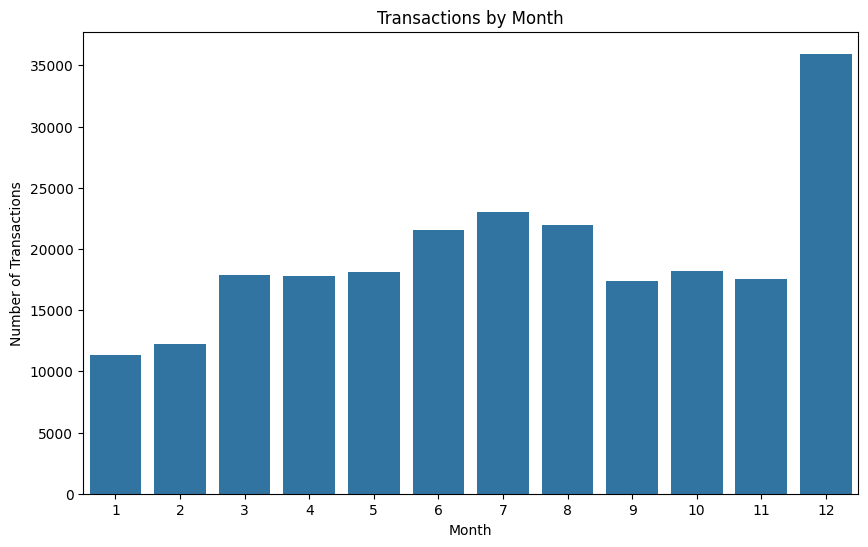

In [17]:
# Convert `unix_time` to datetime format
df['date_time'] = pd.to_datetime(df['unix_time'], unit='s')

# Extract year, month,day and hour for further analysis
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour

# Plot transaction count by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

# Plot transaction count by month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df)
plt.title('Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

> Insights: Morning hours (1 AM - 12 PM) are the busiest for transactions, and December is the highest month, likely due to holiday shopping. Clustering by transaction time and month could reveal segments with specific spending behaviors based on daily and seasonal patterns.

> Considerations: Outliers, especially in amt (transaction amount), can heavily influence clustering, as they may skew distance calculations. Categorical variables need to be encoded for clustering algorithms, which only work with numerical data. Some categories, such as groceries and gas, likely have a higher transaction frequency than others (e.g., travel).

> Issues found: This skewness can cause clustering to group customers based on spending amount rather than meaningful spending behaviors. One-hot encoding can increase the dataset’s dimensionality, leading to sparse data and potential computational inefficiency. Clustering may be biased towards high-frequency categories, resulting in clusters that reflect transaction volume rather than distinct spending behavior.

<hr>

### B.3 Explore Variables of Interest

<hr>

#### B.3.a Feature "amt"

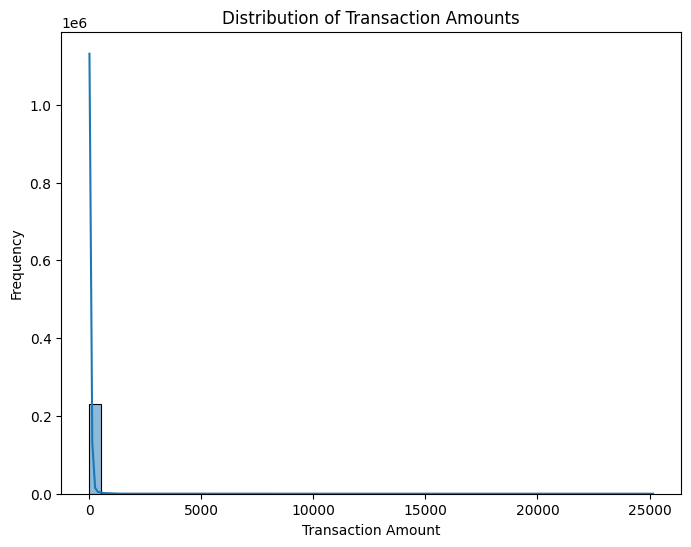

In [18]:
# Distribution of Transaction Amounts
plt.figure(figsize=(8, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

> Insights: The dataset primarily consists of low-value transactions with occasional high-value outliers. This information is useful for customer segmentation based on spending behavior, identifying different spending groups, and preparing the data for clustering analysis.

In [19]:
# Summary statistics for `amt`
print("Summary Statistics for Transaction Amount (amt):")
print(df['amt'].describe())

Summary Statistics for Transaction Amount (amt):
count    232877.000000
mean         60.434561
std         175.844323
min           1.000000
25%           8.150000
50%          38.850000
75%          70.660000
max       25159.920000
Name: amt, dtype: float64


> Insights: The skewed distribution and high variability suggest the potential to segment customers based on spending levels, such as frequent low spenders versus occasional high spenders.

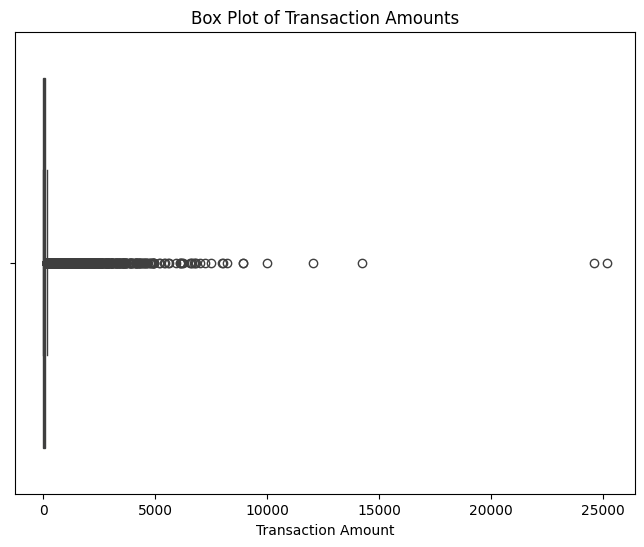

In [20]:
# Box plot of Transaction Amounts
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['amt'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

> Insights: The box plot confirms that most transactions are low-value, with a few high-value outliers. This could support clustering customers into low spenders and high spenders, but data transformations may be needed to minimize outlier influence in clustering analysis.

In [21]:
home_amt = df[df['category'] == 'home']['amt']

# Display the first few rows of the 'amt' values for category 'home'
print("Amount spent for category 'home':")
print(home_amt.head())

# Summary statistics for 'amt' in the 'home' category
home_amt_stats = home_amt.describe()
print("Summary statistics for amount spent on 'home':")
print(home_amt_stats)

Amount spent for category 'home':
676    154.14
678    129.72
680    134.49
685    131.74
691    129.31
Name: amt, dtype: float64
Summary statistics for amount spent on 'home':
count    23566.000000
mean        58.715469
std        229.462898
min          1.000000
25%          6.440000
50%         21.610000
75%         65.555000
max      25159.920000
Name: amt, dtype: float64


> Insights: The analysis of the amt values within the "home" category revealed that although the majority of transaction amounts are relatively low, with a mean of approximately 58.72 and a median (50th percentile) of 21.61, there is a significant range in values, with a maximum amount of 25,159.92. This higher value was initially flagged as a potential outlier. However, since this amount consistently appears in the "home" category, it is likely a legitimate transaction rather than a data entry error. Therefore, I have decided to keep the outliers.

> Considerations: The distribution of amt is heavily right-skewed, with most transactions being small amounts and a few very large transactions. Different customers have different spending habits; some may frequently make high-value transactions while others rarely do. Using amt for clustering should ideally lead to interpretable clusters that represent different types of spenders (e.g., low spenders, moderate spenders, high spenders).

> Issues found: This skewness can make it difficult for clustering algorithms to distinguish between spending patterns if the data isn’t normalized. If clustering is done without considering this variation, it may create clusters based more on transaction amount rather than meaningful spending patterns. High-value spenders and low-value spenders might end up in the same cluster if not carefully managed. Without appropriate scaling, the clusters may be challenging to interpret, as they could reflect minor differences in transaction amounts rather than distinct spending behaviors.

#### B.3.b Feature "category"

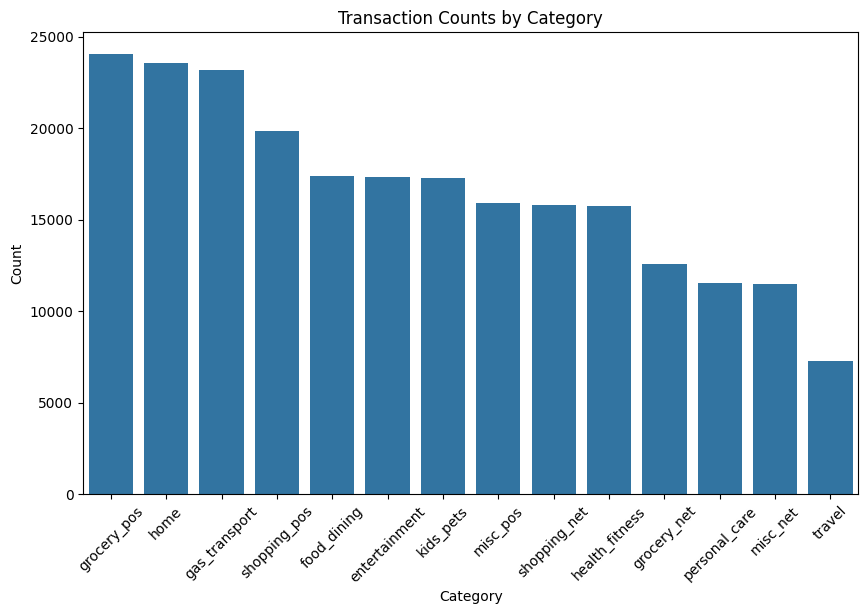

In [22]:
plt.figure(figsize=(10, 6))

# Create a count plot of transactions by category, ordered by frequency
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

> Insights: Countplot suggest that categories like "grocery_pos", "home", and "gas_transport" represent fundamental spending patterns, whereas categories with fewer transactions may reveal unique customer segments with more discretionary spending. This information will be useful for clustering customers based on spending behavior and can guide targeted marketing strategies based on customer preferences.

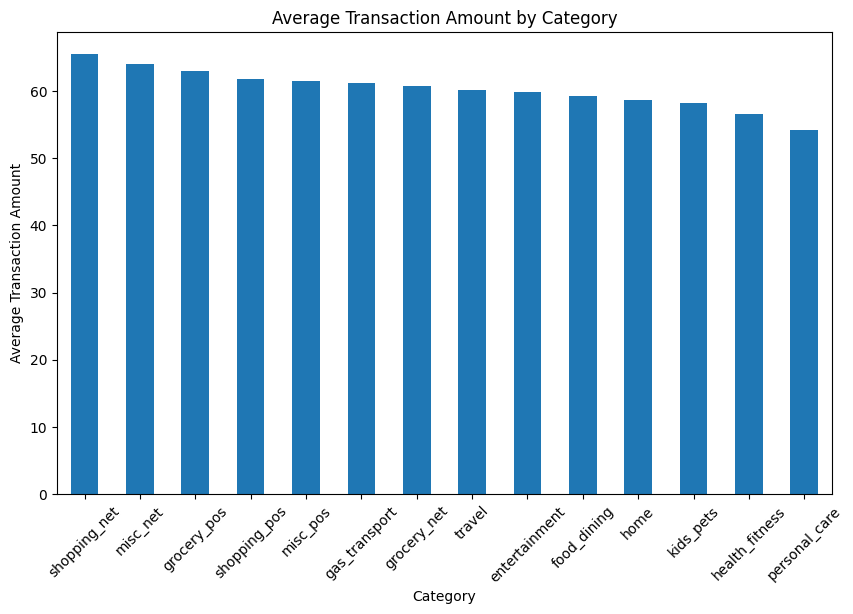

In [23]:
# Mean transaction amount by category
mean_amt_by_category = df.groupby('category')['amt'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
mean_amt_by_category.plot(kind='bar')
plt.title('Average Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.show()

> Insights: The transaction amounts are fairly consistent across categories, with slight variations that may help in understanding spending behavior but may not alone create distinct clusters. Categories with higher averages, like shopping_net, may still be useful for identifying high-spending customer segments.

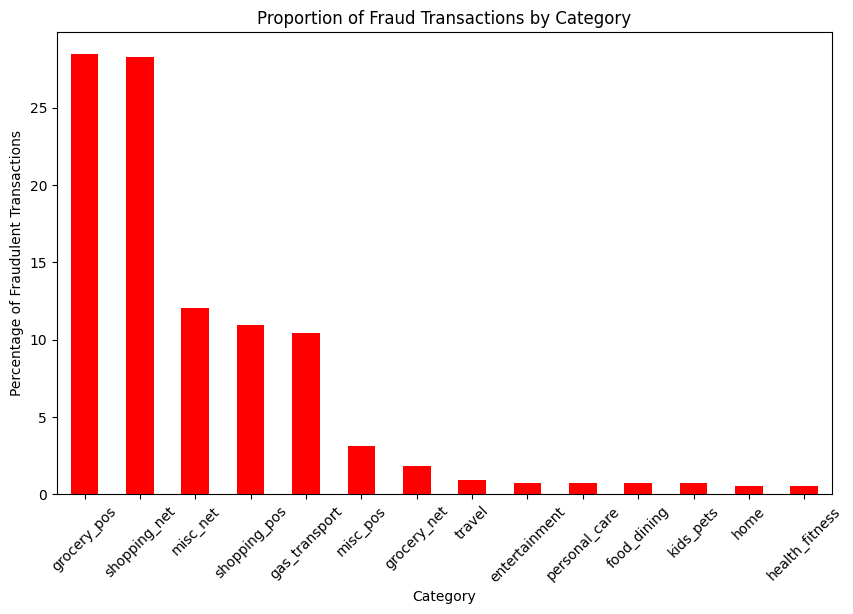

In [24]:
# Proportion of fraud transactions by category
fraud_by_category = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
fraud_by_category.plot(kind='bar', color='red')
plt.title('Proportion of Fraud Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

> Insights: Certain categories, like "grocery_pos" and "shopping_net", have much higher fraud rates, suggesting they are more vulnerable to fraudulent transactions. These insights could guide strategies for fraud prevention or inform clusters based on spending behavior associated with higher fraud risk. However, this is more relevant to fraud analysis than customer clustering.

> Considerations: Different categories may represent vastly different spending behaviors (e.g., groceries vs. travel), which could influence the clustering process. Certain categories, such as "grocery_pos" and "shopping_net," have a higher fraud rate, which could affect clustering if fraudulent transactions are not accounted for separately. Some categories may represent similar types of spending, such as "grocery_pos" and "grocery_net" or "shopping_pos" and "shopping_net."

> Issues found: Without proper scaling or consideration, clusters may be influenced more by high-frequency categories (like groceries or gas) than by low-frequency ones (like travel). This imbalance might obscure significant but infrequent spending patterns. Mixing high-risk and low-risk categories in clustering could lead to groups that are less cohesive in terms of spending behavior but more aligned by fraud potential, which may not be the intended clustering outcome if fraud is not a primary focus. Treating these closely related categories as distinct could split natural clusters, while combining them could help reveal broader spending patterns. Proper grouping could enhance clustering outcomes.

<hr>

## C. Data Cleaning


In [25]:
data_cleaning_executive_summary = 'In the data cleaning process, the primary objective was to ensure the dataset\'s quality and readiness for subsequent analysis. We focused on removing redundancies, correcting data types, and handling missing or irrelevant information. Specifically, we removed unnecessary columns, such as \'unix_time\' and \'date_time\', which did not contribute to the clustering goals and were adding redundant information. Moreover, categorical features were grouped into broader categories to simplify the dataset, which improved the effectiveness of pattern identification during clustering.\n\nAdditionally, the conversion of certain fields to appropriate data types, such as mapping \'is_fraud\' from an object to a numeric type, enabled more accurate computations and compatibility with machine learning models. These transformations and eliminations have enhanced data integrity and prepared the dataset for efficient clustering and segmentation, ultimately aiding in the development of useful insights for decision-making.'

<hr>

### Creating a copy of df and save it into a variable called df_cleaned

In [26]:
df_cleaned = df.copy()

### C.1 Removing Unnecessary Columns

> Rationale: The columns 'unix_time' and 'date_time' were dropped from the dataset because they were not contributing meaningfully to the clustering analysis. In the context of clustering customers based on spending behaviors, these time-based columns did not contain information that would help distinguish patterns relevant to customer segmentation. Removing such columns reduces noise, decreases dimensionality, and ensures that only informative features are used, which can lead to more accurate and interpretable clustering results.

In [27]:
# Remove unnecessary columns 'unix_time' and 'date_time' from the dataset
df_cleaned = df.drop(['unix_time', 'date_time'], axis=1)

> Results: After dropping the 'unix_time' and 'date_time' columns, the dataset was cleaned and made more focused for clustering. The removal of these non-contributing features helped in improving the clustering quality, as only the features relevant to customer spending behaviors were used in the analysis. This led to more distinct clusters that were easier to interpret and use for generating actionable insights, like tailoring marketing campaigns to customer groups with similar spending patterns.

<hr>

### C.2 Fixing Data Type

> Rationale: The is_fraud column was converted from an object type to a float type to ensure that numerical operations could be performed on it, which is essential for clustering. Since clustering algorithms require numerical input, converting is_fraud enables it to be incorporated effectively in the model, potentially helping identify patterns in customer behavior that could be indicative of fraud within certain clusters.

In [28]:
# Convert `is_fraud` from object to float
df_cleaned['is_fraud'] = df['is_fraud'].astype(float)

> Results: After converting is_fraud to a float type, the dataset became more suitable for clustering. This allowed the algorithm to take fraud-related behavior into account while forming the clusters. As a result, the model could distinguish groups with potentially fraudulent transactions, making the clusters more informative for use in detecting unusual spending patterns or risks, which could be useful for targeted interventions.

<hr>

### C.3 Fixing Category Granularity

> Rationale:  The category column was mapped to broader groups using a dictionary (category_bins) to reduce the number of distinct categories and provide more generalized insights. This helps simplify the data for clustering, making it easier for the algorithm to identify meaningful patterns. By grouping the original categories into broader segments like 'Essentials,' 'Shopping,' 'Entertainment,' 'Wellness,' and 'Home_Family,' the model can focus on larger behavioral trends, which can lead to clearer and more interpretable clusters.

In [29]:
# Define broader category groups to consolidate specific spending categories
category_bins = {
    'grocery_pos': 'Essentials', 'grocery_net': 'Essentials', 'gas_transport': 'Essentials',
    'shopping_pos': 'Shopping', 'shopping_net': 'Shopping', 'misc_pos': 'Shopping', 'misc_net': 'Shopping',
    'entertainment': 'Entertainment', 'travel': 'Entertainment', 'food_dining': 'Entertainment',
    'health_fitness': 'Wellness', 'personal_care': 'Wellness',
    'home': 'Home_Family', 'kids_pets': 'Home_Family'
}

# Map specific categories in 'category' column to these broader groups
df_cleaned['category'] = df_cleaned['category'].map(category_bins)

> Results: After mapping the category column to broader groups, the dataset was simplified, reducing the dimensionality and improving the interpretability of the clusters. As a result, clustering now highlights distinct spending behavior patterns among groups like 'Essentials' or 'Entertainment.' This enhanced the ability to understand customers' spending habits at a macro level, leading to more insightful customer segmentation, which can help in customizing marketing strategies or identifying specific customer needs more effectively.

<hr>

## D. Feature Engineering

In [30]:
feature_engineering_executive_summary = 'The feature engineering process was designed to enhance the dataset for clustering analysis by introducing features that capture customer spending behavior and preferences in greater detail. Key features engineered include the categorization of spending levels, aggregation of spending metrics, and the calculation of category-wise spending for each customer.\nSpecifically, spending levels were binned into distinct categories (\'Very Low\', \'Low\', \'Medium\', \'High\', \'Very High\') to create a simplified representation of customer spending amounts. Additionally, metrics like total spending per customer, average transaction amount, and transaction count per customer were calculated to give a holistic view of spending patterns. Total spending per category for each customer was also computed to understand the distribution of spending across different types of purchases, such as essentials, shopping, entertainment, wellness, and home/family-related expenses.\nThese engineered features enriched the dataset and provided the foundation for identifying distinct customer segments with similar spending behaviors. This will facilitate better-targeted marketing campaigns and enable the development of more personalized engagement strategies.'

<hr>

### D.1 New Feature "amt_binned"

> Rationale: The rationale behind creating spending level categories using binning is to segment customers based on their spending behavior. By dividing the spending amounts into meaningful categories—such as 'Very Low', 'Low', 'Medium', 'High', and 'Very High'—we can effectively capture the variability in customer expenditure. This binning approach helps standardize spending values, which is crucial for clustering, as it highlights different spending patterns across groups without being skewed by extremely high or low values.

In [31]:
# Define custom bin edges and labels
bin_edges = [0, 8.15, 38.85, 70.66, 250, float('inf')]
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Apply binning to create spending level categories
df_cleaned['amt_binned'] = pd.cut(df_cleaned['amt'], bins=bin_edges, labels=bin_labels)

> Results: The resulting dataset now contains an additional feature, amt_binned, which categorizes each spending amount into one of five levels. This facilitates better clustering, as it allows the model to consider the spending behavior at a high level, making it easier to differentiate customers based on their overall expenditure. This step aids in identifying distinct customer segments with varying levels of spending, contributing to more meaningful and interpretable clusters.

<hr>

### D.2 New Feature "total_spending_per_customer", "avg_transaction_per_customer", and "transaction_count_per_customer"

> Rationale: The rationale for calculating total spending, average transaction amount, and transaction count per customer is to generate features that effectively capture customer spending behavior. These new metrics provide insights into a customer's overall financial engagement, typical transaction size, and purchasing frequency. These factors are essential for clustering because they help differentiate between customers who are frequent, small spenders versus those who spend infrequently but with higher value, aiding in the creation of distinct customer segments.

In [32]:
# Calculate total spending, average transaction amount, and transaction count per customer
df_cleaned['total_spending_per_customer'] = df_cleaned.groupby('acct_num')['amt'].transform('sum')
df_cleaned['avg_transaction_per_customer'] = df_cleaned.groupby('acct_num')['amt'].transform('mean')
df_cleaned['transaction_count_per_customer'] = df_cleaned.groupby('acct_num')['amt'].transform('count')

> Results: The resulting dataset now contains three additional features: total_spending_per_customer, avg_transaction_per_customer, and transaction_count_per_customer. These features help in grouping customers more meaningfully by highlighting differences in overall spending, spending consistency, and purchasing frequency. This additional information makes the clustering process more robust, allowing for the identification of distinct customer segments with different financial behaviors, which can ultimately guide marketing strategies and personalized offers.

<hr>

### D.3 New Feature "category_spending"

> Rationale: Calculating total spending per category for each customer aims to capture a more detailed view of customer preferences across different spending areas. By aggregating spending by category, we gain insight into which types of products or services each customer values the most. These features are crucial for clustering because they enable segmentation based on preferences for spending on essentials, shopping, entertainment, etc. This step adds granularity to the dataset, helping create clusters that better reflect customer lifestyle and preferences.

In [33]:
# Calculate total spending per category for each customer
category_spending = df_cleaned.pivot_table(index='acct_num', columns='category', values='amt', aggfunc='sum').fillna(0)
category_spending.columns = [f'category_{col}_spending' for col in category_spending.columns]
df_cleaned = df_cleaned.merge(category_spending, on='acct_num', how='left')

> Results: The dataset was enhanced with new features representing total spending for each category, such as category_Essentials_spending, category_Shopping_spending, etc. Each feature captures the total spending by each customer in a particular category. These new features make clustering more effective by allowing the algorithm to identify and group customers with similar spending patterns in specific areas, leading to more meaningful segments that can be leveraged for targeted marketing campaigns, personalized recommendations, and customer engagement strategies.

<hr>

## E. Save Datasets

In [34]:
# Save the transaction-level dataset
df_cleaned.to_csv("transaction_data_cleaned.csv", index=False)

<hr>